In [1]:
%matplotlib notebook

Goal here is to replot the relationship between tau and the concentration step so that color and style fits rest of the paper

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import io as sio
from pathlib import Path
import pandas as pd

# Statistics:
from scipy import stats
import statsmodels.api as sm
import scikit_posthocs as sp
# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
sim_filepath = Path('G:\\My Drive\\PhD\Papers\\Vanishing spikes\\all_data\\OSN_simulations')
data_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\ephys\\Or42bSF EtB\\step stim')
#save_path = Path('G:\\Shared drives\\LouisLab COLLABORATIVE Vanishing Spikes\\Fig3_plots')
save_path = 'Declare Path'
#savepath_for_stats = Path('G:\\Shared drives\\LouisLab COLLABORATIVE Vanishing Spikes\\stats_files')
savepath_for_stats = 'Declare Path'


relevant_folders = ['EtB 10000000pM',
                   'EtB 100000000pM',
                   'EtB 1000000000pM']

sample_freq = 10000 # recording frequency was always 10 kHz
    
data = sio.loadmat(Path(sim_filepath, 'DepolarizationTimeConstant.mat'))

In [5]:
def extract_depol_onset(data_csv):
    """
    collect depolarization onset data
    """
    depol_onset = []
    for current_column in data_csv.columns:
        if 'PSTH_2022' in current_column:
            print(current_column)
            depol_onset.append(np.where(abs(data_csv.loc[odor_stim_indeces][current_column].diff() > 1))[0][-1]/sample_freq)
            print(depol_onset[-1])
    return(depol_onset)

In [6]:
all_depol_onset = {}

for current_folder in relevant_folders:
    current_folder_path = Path(data_path, current_folder)
    print(current_folder)
    for current_file in current_folder_path.iterdir():

        if 'csv' in current_file.name:
            data_csv = pd.read_csv(current_file)
            try:
                odor_stim = data_csv['pressure [mbar]']
            except KeyError:
                odor_stim = data_csv['pressure Ch2 [mbar]']
            odor_stim_indeces = np.where(odor_stim > 150)[0]
            
            all_depol_onset[current_folder] = extract_depol_onset(data_csv)

EtB 10000000pM
PSTH_20220119_11-42-44_pCh1_Ch1_EtB10uM_step_down
12.5839
PSTH_20220119_11-44-31_pCh1_Ch1_EtB10uM_step_down
13.5079
PSTH_20220119_19-57-08_pCh1_Ch1_EtB10uM_step_down
15.7519
PSTH_20220119_19-55-21_pCh1_Ch1_EtB10uM_step_down
17.2369
PSTH_20220119_14-38-10_pCh1_Ch1_EtB10uM_step_down
19.9099
PSTH_20220119_14-12-08_pCh1_Ch1_EtB10uM_step_down
12.8809
PSTH_20220304_19-07-30_pCh1_Ch3_EtB10uM_200mbar
16.5769
PSTH_20220304_19-09-43_pCh1_Ch3_EtB10uM_200mbar
15.8839
PSTH_20220227_17-16-05_pCh3_Ch2_EtB10uM_200mbar
18.1939
EtB 100000000pM
PSTH_20220127_18-55-21_pCh3_Ch2_EtB100uM_200mbar
12.2977
PSTH_20220127_18-13-35_pCh3_Ch2_EtB100uM_200mbar
12.0667
PSTH_20220303_13-36-04_pCh3_Ch2_EtB100uM_200mbar
11.0107
PSTH_20220303_13-38-16_pCh3_Ch2_EtB100uM_200mbar
12.0667
PSTH_20220303_14-32-38_pCh3_Ch1_EtB100uM_200mbar
11.6047
PSTH_20220304_11-39-37_pCh3_Ch2_EtB100uM_200mbar
12.0007
PSTH_20220320_14-33-47_pCh2_Ch1_EtB100uM_200mbar
12.1987
PSTH_20220320_15-24-18_pCh3_Ch1_EtB100uM_200mbar
13.51

In [7]:
conc = []
mean_onset = []
for current_conc in all_depol_onset:
    conc.append(int(current_conc.split(' ')[-1].split('pM')[0])/1e6)
    mean_onset.append(np.nanmean(all_depol_onset[current_conc]))

<IPython.core.display.Javascript object>


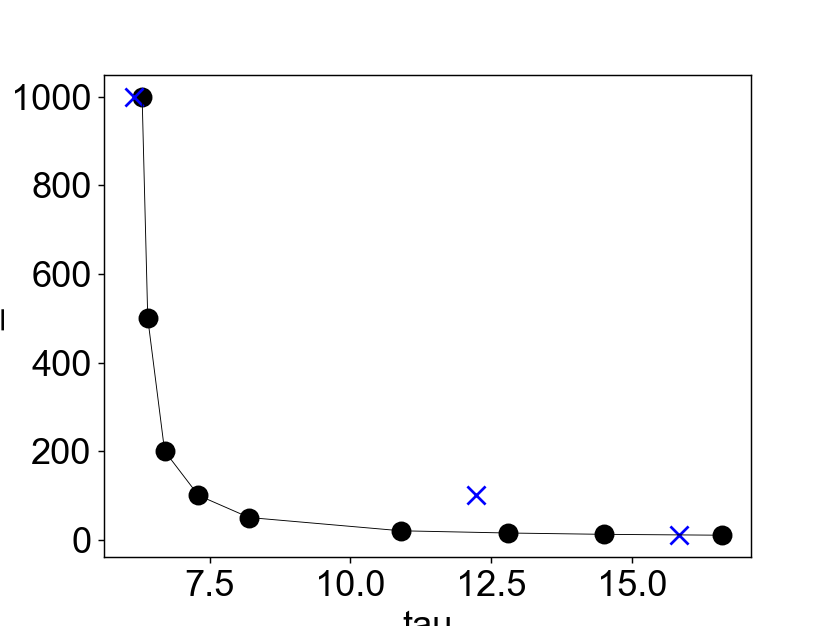

Text(0.5, 0, 'tau')

In [9]:
s = 100
lw = 0.5 # depending on how the figure is scaled, change this to get more details


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    data['tau'],
    data['c_h'].T, c='k', lw=lw)
ax.scatter(
    data['tau'],
    data['c_h'].T, c='k', s=s)

ax.scatter(mean_onset,
           conc, c='b', marker='x', s=s)
ax.set_ylabel('c_h')
ax.set_xlabel('tau')
#fig.savefig(Path(save_path, 'Fig5G_depol_onset_tau_vs_c.svg'))

<IPython.core.display.Javascript object>


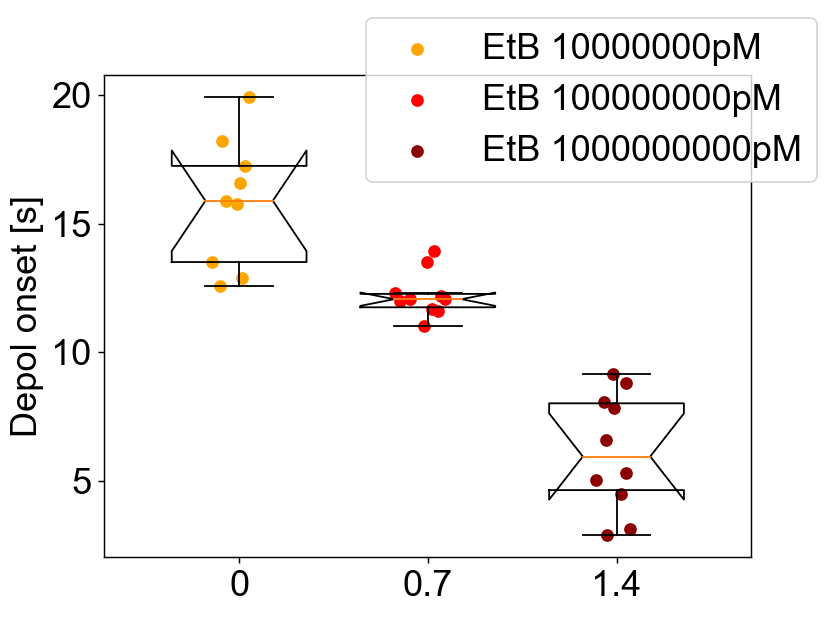

EtB 10000000pM
EtB 100000000pM
EtB 1000000000pM


In [10]:
color = ['orange', 'red', 'darkred']

fig = plt.figure()
ax = fig.add_subplot()

x_position = 0

for counter, current_conc in enumerate(all_depol_onset):
    print(current_conc)
    ax.boxplot(all_depol_onset[current_conc], positions=[x_position], widths=(0.5),
              notch=True, showfliers = False)
    
    x = np.random.normal(x_position, 0.05, size=len(all_depol_onset[current_conc]))
    
    ax.scatter(x, all_depol_onset[current_conc], label = current_conc, c=color[counter])
    
    x_position += 0.7
    
ax.set_ylabel('Depol onset [s]')
fig.legend()

#fig.savefig(Path(save_path, 'Fig5G_depol_onset_boxplots.svg'))

# Statistics

In [12]:
data_flat = []
df_for_stats = None
print('Lilliefors tests')
for current_conc in all_depol_onset:
    print(current_conc)
    print(sm.stats.lilliefors(all_depol_onset[current_conc]))
    
    # For kruskal test, create a flat list
    data_flat.append(all_depol_onset[current_conc])
    
    # for posthoc conover it's a bit more complicated as 
    # I need a pandas dataframe
    dict_for_stats = {
    'odor conc': current_conc,
    'depol onset': all_depol_onset[current_conc]
    }

    df_to_add = pd.DataFrame(dict_for_stats)
    
    try:
        df_for_stats = pd.concat([df_to_add, df_for_stats],
                                 ignore_index=True)
        df_for_stats.reset_index()
    except Exception as e:
        print(e)
        df_for_stats = df_to_add
    
print('\n\n')

# CANT USE ANOVA AS DATA IS NOT NORMALLY DISTRIBUTED
print(stats.kruskal(*data_flat))

print('\n\nPosthoc Conover test')

print(sp.posthoc_conover(df_for_stats, val_col='depol onset', group_col='odor conc', p_adjust = 'holm'))

Lilliefors tests
EtB 10000000pM
(0.1589322677345804, 0.7368622249072493)
EtB 100000000pM
(0.2729811638961962, 0.03550505090959914)
EtB 1000000000pM
(0.1684661414978651, 0.5789977291278204)



KruskalResult(statistic=23.434737620103473, pvalue=8.15100920085576e-06)


Posthoc Conover test
                  EtB 1000000000pM  EtB 100000000pM  EtB 10000000pM
EtB 1000000000pM      1.000000e+00     9.550529e-07    3.273732e-11
EtB 100000000pM       9.550529e-07     1.000000e+00    3.163114e-05
EtB 10000000pM        3.273732e-11     3.163114e-05    1.000000e+00


In [11]:
# The difference in depolarization block onset is significantly different for all conditions

# Export

In [13]:
corrected_group_names = []
labels = df_for_stats.drop_duplicates(subset = ["odor conc"])['odor conc'] #extract unique group names
print(labels)

temp_data = df_for_stats.replace(
    ['EtB 1000000000pM', 'EtB 100000000pM', 'EtB 10000000pM'],
    ['EtB 1000 uM', 'EtB 100 uM', 'EtB 10 uM']
    )
corrected_group_names.append(temp_data)
new_labels = temp_data.drop_duplicates(subset = ["odor conc"])['odor conc'] #extract unique group names
print(new_labels)

0     EtB 1000000000pM
10     EtB 100000000pM
20      EtB 10000000pM
Name: odor conc, dtype: object
0     EtB 1000 uM
10     EtB 100 uM
20      EtB 10 uM
Name: odor conc, dtype: object


In [14]:
shared_functions.export_statistics_multiple(corrected_group_names[0], savepath=savepath_for_stats,
                                      savename='Fig5G', parametric=False, data_label='depol onset',
                                       group_label='odor conc')

['EtB 1000 uM', 'EtB 100 uM', 'EtB 10 uM']
     odor conc   n       mean   median       STD       SEM  \
0  EtB 1000 uM  10   6.151200   5.9664  2.171563  0.217156   
1   EtB 100 uM  10  12.238300  12.0667  0.831417  0.083142   
2    EtB 10 uM   9  15.836233  15.8839  2.342980  0.260331   

                         95% CI on the mean statistical test  H statistic  \
0   (4.513727744265359, 7.7886722557346415)   Kruskal-Wallis    23.434738   
1  (11.611368292667699, 12.865231707332299)             <NA>          NaN   
2  (13.926012161868968, 17.746454504797697)             <NA>          NaN   

    p value significant  effect size: eta^2  
0  0.000008         YES            0.824413  
1       NaN         NaN                 NaN  
2       NaN         NaN                 NaN  


                EtB 10 uM    EtB 100 uM   EtB 1000 uM
EtB 10 uM    1.000000e+00  3.163114e-05  3.273732e-11
EtB 100 uM   3.163114e-05  1.000000e+00  9.550529e-07
EtB 1000 uM  3.273732e-11  9.550529e-07  1.000000e+